# Read the dataset

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/UK dataset\/data.csv',encoding = 'unicode_escape')
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


# Analyze the components of the dataset

In [3]:
# Check for null values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
# The shape of the dataset
print('The shape of the dataset is: ',df.shape)

The shape of the dataset is:  (541909, 8)


Here by, it can be seen that the customerID misses a lot. Therefore, we will remove these ID in analyzing the dataset for other models. But we still retain another version to analyze which product is the most common to boost their sales in the upcoming future

In [7]:
index_remove = np.where(df['InvoiceNo'].str.startswith('C'))
df = df.drop(index_remove[0])
df = df.dropna()
print('The shape of the dataset is: ',df.shape)

The shape of the dataset is:  (397924, 8)


In [8]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


# Transform some components of the dataset

In [9]:
df['Description'] = df['Description'].str.lower()
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Day'] = df['InvoiceDate'].dt.day
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year
df['Date'] = df['InvoiceDate'].dt.date
df.Description = df.Description.str.replace('.', '')
df = df[df['Year']==2011]
df = df[df['Quantity']>0]
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Month,Year,Date
42481,539993,22386,jumbo bag pink polkadot,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,4,1,2011,2011-01-04
42482,539993,21499,blue polkadot wrap,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,4,1,2011,2011-01-04
42483,539993,21498,red retrospot wrap,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,4,1,2011,2011-01-04
42484,539993,22379,recycling bag retrospot,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,4,1,2011,2011-01-04
42485,539993,20718,red retrospot shopper bag,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,4,1,2011,2011-01-04


In [10]:
# Calculate the total sum 
df['Price'] = df['Quantity']*df['UnitPrice']
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Month,Year,Date,Price
42481,539993,22386,jumbo bag pink polkadot,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,4,1,2011,2011-01-04,19.5
42482,539993,21499,blue polkadot wrap,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,4,1,2011,2011-01-04,10.5
42483,539993,21498,red retrospot wrap,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,4,1,2011,2011-01-04,10.5


# Analyze the sales of UK Ecommerce throughtout the year 2011

<BarContainer object of 12 artists>

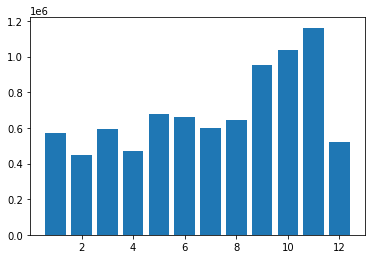

In [11]:
import matplotlib.pyplot as plt
sales = df.groupby(['Year','Month'])['Price'].sum().values
plt.bar(range(1,13),sales)

From this bar chart, it can be seen that the sales of the product tends to be the highest in September, October and November. One proposition can be that Christmas and Thanksgiving are approaching. Therefore, it may be that the demand for presents is high in these periods. To consolidate the proposition, we can analyze the characteristics of products sold and the countries that buy the products to see if that is the case

In [12]:
# Now we will analyze the sales of the products by seeing which product is sold in which month of the year
product_sold = df.groupby(['Month','Description'])['Quantity'].sum().reset_index()
product_sold = product_sold[product_sold['Month']>=9].sort_values(['Month','Quantity'], ascending=False)
product_sold.groupby('Month').head(3)

,Month,Description,Quantity
27333,12,"paper craft , little birdie",80995
27477,12,popcorn holder,5362
27501,12,rabbit night light,3691
23522,11,asstd design 3d paper stickers,12551
25139,11,rabbit night light,12393
25108,11,popcorn holder,8458
23285,10,world war 2 gliders asstd designs,8174
22419,10,rabbit night light,6249
22386,10,popcorn holder,5644
19245,9,jumbo bag red retrospot,4177


Now we will check the products that have the name christmas in its name and see how much do they contribute to the total sales of the month

<BarContainer object of 12 artists>

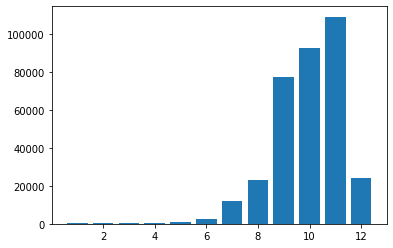

In [13]:
df_temp = df[df['Description'].str.contains('christmas')]
sales_month = df_temp.groupby('Month')['Price'].sum()
plt.bar(range(1,13),sales_month.values)

Hereby, it can be seen that it is true christmas contributes to the sales of the products during the last quarters of the year



There are 538868 words in the combination of all review.


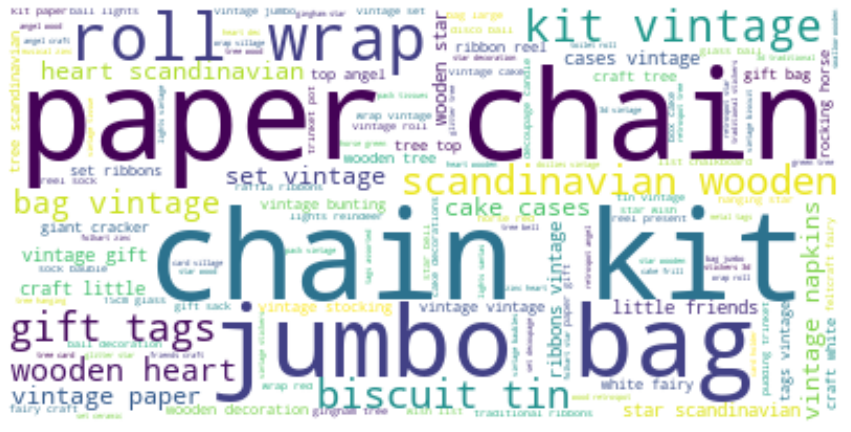

In [14]:
from wordcloud import WordCloud, STOPWORDS
# In order to boost the sale of the product during this period, we should boost the sales of these common products. We can 
# divide into 2 cases. The first aspect is to look at only the description of the product, the second aspect is to look at the
# sales of the products
plt.figure(figsize=(15,15))
text = " ".join(review for review in df_temp.Description)
print ("There are {} words in the combination of all review.".format(len(text)))
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["christmas"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

From this, it can quickly be seen that such products with the keywords as jumbo bag, scandinavian, wooden, chain, christmas kit, paper, vintage, biscuit tin are the most frequent keywords that are used. If the marketing team wants to boost the sales of the products, these keywords can be paid attention to in order to boost the spreadness of the products towards the customers

In [15]:
# Now we will analyze which product contributes most to the sales that relates to christmas
sales_by_product = df_temp.groupby('Description')['Price'].sum()
sales_by_product.sort_values(ascending=False).head(10)

Description
paper chain kit 50's christmas         38046.68
paper chain kit vintage christmas      22422.97
jumbo bag 50's christmas               17679.72
vintage christmas bunting              12994.77
christmas lights 10 reindeer           11116.40
jumbo bag vintage christmas             9748.34
15cm christmas glass ball 20 lights     8718.90
set of 6 ribbons vintage christmas      8049.28
36 doilies vintage christmas            7006.25
feltcraft christmas fairy               6927.93
Name: Price, dtype: float64

# Build an RFM model

Now we will segment the customers into 4 groups.

In [16]:
import datetime as dt
PRESENT = dt.datetime(2011,12,10) #maximum date
rfm= df.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days, # Recency
                                   'InvoiceNo': lambda num: len(num), # Frequency
                                   'Price': lambda price: price.sum()}) # Monetary
rfm.head(5)

,InvoiceDate,InvoiceNo,Price
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,151,3598.21
12348.0,75,14,904.44
12349.0,18,73,1757.55
12350.0,310,17,334.40


In [17]:
rfm.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','Price':'Monetary'},inplace=True)
rfm.head(5)

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,151,3598.21
12348.0,75,14,904.44
12349.0,18,73,1757.55
12350.0,310,17,334.40


In [18]:
rfm['r_quartile'] = pd.qcut(rfm['Recency'], 4, ['1','2','3','4'])
rfm['f_quartile'] = pd.qcut(rfm['Frequency'], 4, ['4','3','2','1'])
rfm['m_quartile'] = pd.qcut(rfm['Monetary'], 4, ['4','3','2','1'])
rfm.head(5)

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12347.0,2,151,3598.21,1,1,1
12348.0,75,14,904.44,3,4,2
12349.0,18,73,1757.55,2,2,1
12350.0,310,17,334.40,4,4,3


In [19]:
rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head(4)

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12346.0,325,1,77183.60,4,4,1,441
12347.0,2,151,3598.21,1,1,1,111
12348.0,75,14,904.44,3,4,2,342
12349.0,18,73,1757.55,2,2,1,221


<BarContainer object of 62 artists>

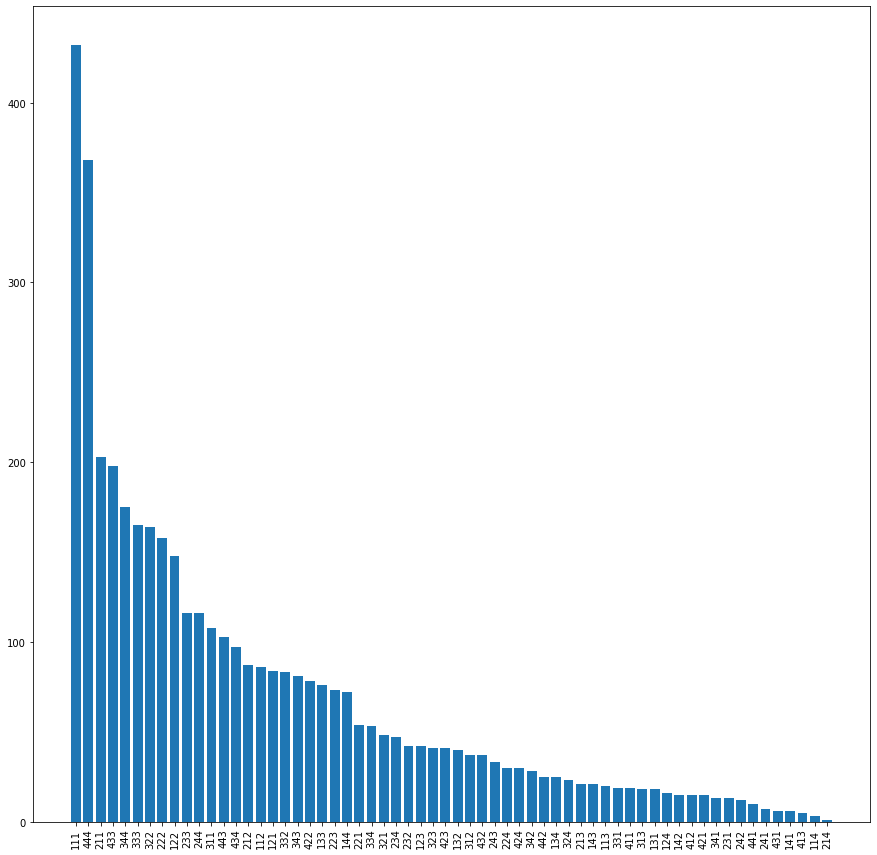

In [20]:
index_col = rfm['RFM_Score'].value_counts().index.tolist()
values = rfm['RFM_Score'].value_counts().tolist()
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
plt.bar(index_col,values)

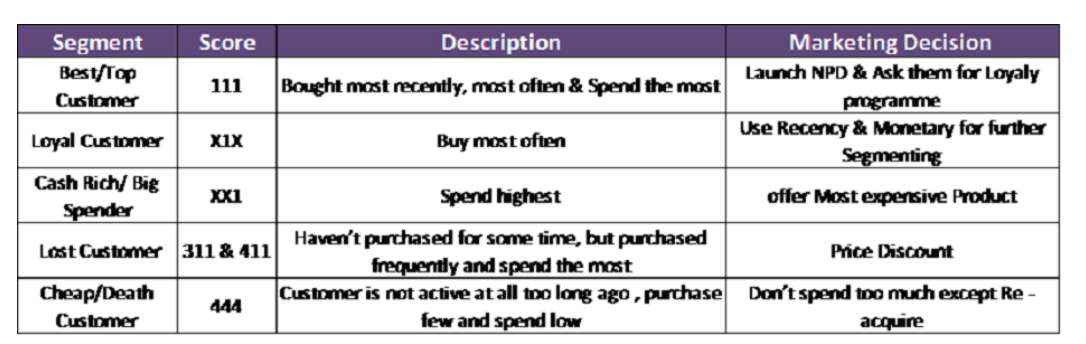

In [21]:
# Now we will try to label each group to the corresponding customers
def convert_score(score):
  if score=="111":
    return "Best/Top Customer"
  if score[1]=="1":
    return "Loyal Customer"
  if score[2]=="1":
    return "Cash Rich/ Big Spender"
  if score=="311" or score=="411":
    return "Lost Customer"
  else:
    return "Cheap/Death Customer"

In [22]:
rfm['convert_score'] = rfm['RFM_Score'].apply(convert_score)
rfm['convert_score'].value_counts()

Cheap/Death Customer      2872
Loyal Customer             623
Best/Top Customer          432
Cash Rich/ Big Spender     293
Name: convert_score, dtype: int64

The majority of the customers come from the segments of cheap/death customers. The health of this ecommerce is bad in terms of the level of turning rate for the customers. We also see that the loyal customer accounts for a great proportion. We now can check which product is the most prefered among the loyal customer so we can target at those products and promote that product more or we can further segment the loyal customer. The best/top customer is also the second factor contributing to the sales. Therefore, we should launch new product development and invest in marketing campaign in order to convert these customers into loyal customers. With the big spender, we will now check the products that they tend to buy, check the price and the similarity between products to offer the expensive products for usage.

# Check the product that is most likely to be used among the big spender

In [23]:
df = df.merge(rfm, how='left', on='CustomerID')
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Month,Year,Date,Price,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score,convert_score
0,539993,22386,jumbo bag pink polkadot,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,4,1,2011,2011-01-04,19.5,22,78,1555.32,2,2,2,222,Cheap/Death Customer
1,539993,21499,blue polkadot wrap,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,4,1,2011,2011-01-04,10.5,22,78,1555.32,2,2,2,222,Cheap/Death Customer
2,539993,21498,red retrospot wrap,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,4,1,2011,2011-01-04,10.5,22,78,1555.32,2,2,2,222,Cheap/Death Customer
3,539993,22379,recycling bag retrospot,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,4,1,2011,2011-01-04,10.5,22,78,1555.32,2,2,2,222,Cheap/Death Customer
4,539993,20718,red retrospot shopper bag,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,4,1,2011,2011-01-04,12.5,22,78,1555.32,2,2,2,222,Cheap/Death Customer


In [24]:
product_by_bigspender = df[df['convert_score']=='Cash Rich/ Big Spender'][['Description','CustomerID','UnitPrice']]
product_by_bigspender['Description'].value_counts().head(10)

postage                               146
regency cakestand 3 tier              141
jumbo bag red retrospot               125
white hanging heart t-light holder    105
assorted colour bird ornament          88
party bunting                          87
pack of 72 retrospot cake cases        75
set of 3 cake tins pantry design       70
victorian glass hanging t-light        65
rabbit night light                     63
Name: Description, dtype: int64

# Monthly Retention Rate

One point worthy of note is that

1.   The data does not include data about the sign-up date so we just assume that the first date of purchasing products is the sign up date although they may purchase in the past 
2.   This is the downside because they may be many recurring customers in the dataset


In [25]:
df = df[['CustomerID','InvoiceNo','InvoiceDate']].drop_duplicates()

In [28]:
# Now we create the cohort and order_month variables. The first one indicates the monthly
# cohort based on the first purchase date, the latter one is the truncated month
# of the purchase day
df['order_month'] = df['InvoiceDate'].dt.to_period('M')
df['cohort'] = df.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')
df.head(5)

,CustomerID,InvoiceNo,InvoiceDate,order_month,cohort
0,13313.0,539993,2011-01-04 10:00:00,2011-01,2011-01
17,18097.0,540001,2011-01-04 10:22:00,2011-01,2011-01
26,16656.0,540002,2011-01-04 10:23:00,2011-01,2011-01
30,16875.0,540003,2011-01-04 10:37:00,2011-01,2011-01
52,13094.0,540004,2011-01-04 10:37:00,2011-01,2011-01


In [30]:
# Then we aggregate the data per cohort and order_month and count the number of
# unique customers in each group. Additionally, we add the period_number, which 
# indicates the number of periods between the cohort month and the month of purchase
from operator import attrgetter
df_cohort = df.groupby(['cohort','order_month']).agg(n_customers=('CustomerID','nunique')).reset_index(drop=False)
df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))
df_cohort.head(5)

,cohort,order_month,n_customers,period_number
0,2011-01,2011-01,741,0
1,2011-01,2011-02,262,1
2,2011-01,2011-03,319,2
3,2011-01,2011-04,284,3
4,2011-01,2011-05,339,4


In [31]:
cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')

In [32]:
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

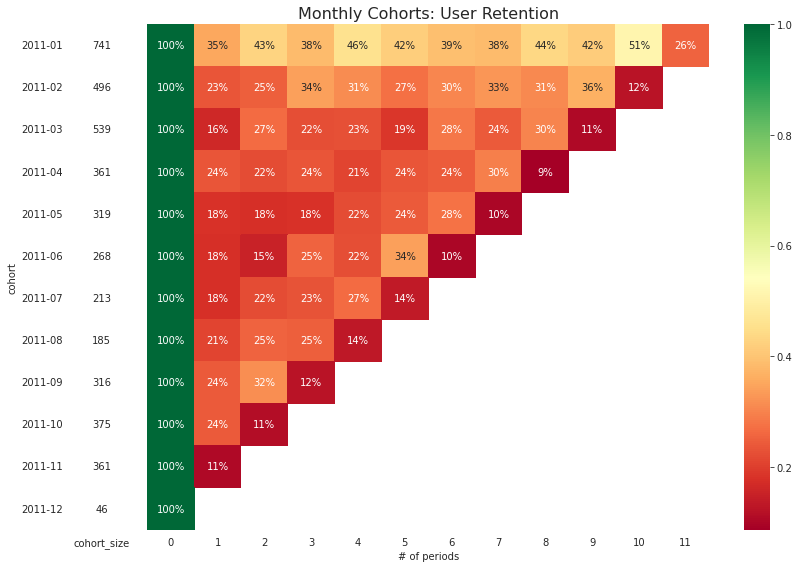

In [34]:
import seaborn as sns
import matplotlib.colors as mcolors
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

From this, it can be seen that there are fluctuations in the retention rate, which can be explained by the periodic behavior of products sold.